**Introduction**

**Labels**

Each training and test example is assigned to one of the following labels:

0 T-shirt/top

1 Trouser

2 Pullover

3 Dress

4 Coat

5 Sandal

6 Shirt

7 Sneaker

8 Bag

9 Ankle boot


**TL;DR**


Each row is a separate image

Column 1 is the class label.

Remaining columns are pixel numbers (784 total).

Each value is the darkness of the pixel (1 to 255)

For this classification exercise on the Iris species data, 
* I first use some simple Python techniques to explore the data set. 
* Then I split half of the data into the training set to train the hypothesis model and half of them as validation set to check the test accuracy score 
* At last, we use the support vector machine to train the classification model.
* And we use GridSearchCV to tune the hyperparameters(C, gamma, kernel) in the SVC model to achieve 100% accuracy score.

One very import reminder is below. train_test_split shuffle the data before doing the split.  GridSearchCV does not shuffle the data before doing cross-validation. And our iris data is ordered by response variable Species ( 50 Iris-setosa, 50 Iris-versicolor, and 50 Iris-virginica)  so we need to shuffle iris before using GridSearchCV.

In the future, I will also add the decision tree, bagging, Boosting and AdaBoost,  random forest classifier, logistic regression, K nearest neighbor classifier, naive Bayes to classify the model. 

**Part I: Import library and load data**

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


train_df = pd.read_csv("../data/fashion-mnist_train.csv")
test_df = pd.read_csv("../data/fashion-mnist_test.csv")

X_train = np.array(train_df)[:,1:]
y_train = np.array(train_df)[:,0]
X_test = np.array(test_df)[:,1:]
y_test = np.array(test_df)[:,0]

**Part II: Check the data information**

2


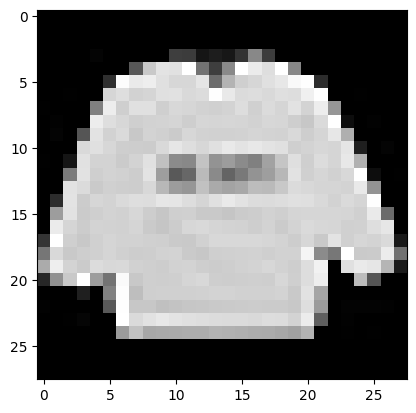

In [33]:
plt.set_cmap('gray')
plt.imshow(X_train[0].reshape(28,28))
print(y_train[0])

**Part III: Model training and testing**

In [34]:
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [35]:

pred=clf.predict(X_test)
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))
print('\n')
print('Accuracy score is: ', accuracy_score(y_test, pred))

[[857   0  11  28   0   2  91   0  11   0]
 [  2 973   3  16   0   1   5   0   0   0]
 [ 10   1 823  14  86   0  62   0   4   0]
 [ 27   7   7 919  22   0  17   0   1   0]
 [  0   0  55  27 869   0  47   0   2   0]
 [  0   0   0   0   0 938   1  43   3  15]
 [151   0  81  28  57   0 675   0   8   0]
 [  0   0   0   0   0  20   0 943   0  37]
 [  5   0   5   3   1   2  10   3 970   1]
 [  0   0   0   0   0   9   0  37   0 954]]


              precision    recall  f1-score   support

           0       0.81      0.86      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.84      0.82      0.83      1000
           3       0.89      0.92      0.90      1000
           4       0.84      0.87      0.85      1000
           5       0.97      0.94      0.95      1000
           6       0.74      0.68      0.71      1000
           7       0.92      0.94      0.93      1000
           8       0.97      0.97      0.97      1000
           9       0.95   